# 2.4 Modélisation descriptive

In [1]:
import pandas as pd                                 # Chargement des librairies necéssaire pour l'étude
import numpy as np
from sklearn.decomposition import PCA               # Clustering library
from pandas.plotting import scatter_matrix
from sklearn import cluster, metrics, preprocessing 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt                     # DataViz library
import seaborn as sns
import plotly.express as px                         
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_rows = None                  # Paramètre d'affichage
pd.options.display.max_columns = None
%matplotlib inline

In [2]:
# Chargement de notre data set
sbf110 = pd.read_csv("sbf110.csv")
sbf110.set_index("Tick", inplace=True)
print("la dimension de notre data set est:\n",sbf110.shape)
sbf110.head(2)

la dimension de notre data set est:
 (110, 43)


,Valued,Val,Stock,L52w,H52w,Price,IVgn,IVdcf,BVPS,EPS,Div,CFPS,TBVPS,RevPS,MoS,ROE,ROA,DtoE,Lev,FiLev,Beta,EPR,DPR,CFP,PM,TSR,Payout,BMR,PER,PBR,PSR,PCF,Ind,Sector,Industry,Shares,Empl,MCap€M,BV€M,TBV€M,Rev€M,Ear€M,CF€M
Tick,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCP,Overvalued,0,Accor SA (ACCP),21.06,42.58,27.53,25.187558,-4.664286,18.04,1.49,1.05,-4.16,1.31,11.30,-0.093000,-0.2720,-0.1208,0.7631,-0.1343,-0.102484,1.06,0.054123,0.038140,-0.151108,0.131858,1.071700,0.704698,0.655285,18.476510,1.526053,2.436283,-6.617788,cac 40,Services,Hôtels et motels,270932350,196020,7458.768,4887.620,354.921,3061.536,403.689,-1127.079
ADP,Overvalued,0,Aeroports de Paris SA (ADP),70.70,181.50,89.50,27.548482,6.283649,44.06,5.39,0.70,5.30,13.53,37.22,-2.248818,-0.0508,-0.0222,2.1257,-0.0357,-0.075887,1.14,0.060223,0.007821,0.059218,0.144815,1.577086,0.129870,0.492291,16.604824,2.031321,2.404621,16.886792,cac mid 60,Transport,Transports (divers),98944352,26122,8855.520,4359.488,1338.717,3682.709,533.310,524.405


In [3]:
sbf = sbf110.copy()
sbf["ROE%"] = round(sbf["ROE"] * 100, 2)
sbf["ROA%"] = round(sbf["ROA"] * 100, 2)
sbf["TSR%"] = round(sbf["TSR"] * 100, 2)
sbf["PM%"] = round(sbf["PM"] * 100, 2)
sbf["Pay%"] = round(sbf["Payout"] * 100, 2)
sbf["EPR%"] = round(sbf["EPR"] * 100, 2)
sbf["DPR%"] = round(sbf["DPR"] * 100, 2)

In [4]:
sbf[["Stock","ROE%","ROA%","TSR%","PM%","Pay%","EPR%","DPR%"]]

,Stock,ROE%,ROA%,TSR%,PM%,Pay%,EPR%,DPR%
Tick,,,,,,,,
ACCP,Accor SA (ACCP),-27.20,-12.08,107.17,13.19,70.47,5.41,3.81
ADP,Aeroports de Paris SA (ADP),-5.08,-2.22,157.71,14.48,12.99,6.02,0.78
AIRF,Air France - KLM SA (AIRF),21.97,-12.94,240.80,1.43,0.00,17.16,0.00
AIRP,Air Liquide SA (AIRP),12.62,5.39,51.17,10.62,56.72,3.97,2.25
AKA,Akka Technologies (AKA),19.85,5.12,301.21,4.93,19.22,20.11,3.86
ABIO,Albioma SA (ABIO),12.61,3.59,118.31,8.98,48.61,3.29,1.60
ALDA,ALD SA (ALDA),12.69,1.96,136.41,5.81,45.00,15.02,6.76
ALSO,Alstom SA (ALSO),12.12,2.66,71.51,5.47,17.59,4.38,0.77
LTEN,Alten SA (LTEN),15.78,8.48,119.71,6.33,15.10,6.56,0.99


In [5]:
activ = sbf[["ROE%","ROA%","PM%","Pay%","EPR%","DPR%",'Beta','PER','PBR','PSR','PCF']]
activ.shape

(110, 11)

<h3>2.3.3.1 Analyse statistiques</h3>

In [6]:
stat01 = activ.describe()
stat01.to_excel("stat01 Stat descrip sur les variables actives.xlsx")
stat01

,ROE%,ROA%,PM%,Pay%,EPR%,DPR%,Beta,PER,PBR,PSR,PCF
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,3.214636,1.559909,8.879455,44.153182,5.273364,4.028727,1.093455,16.368959,2.086811,1.765602,7.597619
std,19.357651,5.425130,27.925332,50.184455,16.926825,3.820709,0.470425,16.352738,2.083017,2.237595,18.867530
min,-124.080000,-24.160000,-158.560000,-211.540000,-142.770000,0.000000,-0.090000,-35.769912,-0.622705,0.028500,-126.200000
25%,1.680000,0.135000,3.235000,19.805000,3.252500,1.397500,0.790000,7.968051,0.789029,0.388249,3.026611
50%,7.080000,2.075000,6.295000,46.805000,6.535000,3.125000,1.040000,12.980706,1.435380,0.873099,6.465232
75%,11.725000,4.012500,10.530000,67.545000,10.335000,5.680000,1.315000,24.333016,2.325152,2.544696,12.479779
max,41.090000,14.590000,223.210000,235.290000,26.250000,18.340000,2.740000,70.420561,11.103571,12.321041,56.441948


In [7]:
stat00 = activ.corr()
stat00.to_excel("stat02 Matrice de correlation des variables actives de la base.xlsx")
stat00

,ROE%,ROA%,PM%,Pay%,EPR%,DPR%,Beta,PER,PBR,PSR,PCF
ROE%,1.000000,0.859899,0.482041,0.197240,0.596367,0.031969,-0.318943,0.349229,0.277958,0.183187,0.232971
ROA%,0.859899,1.000000,0.423884,0.173950,0.410204,-0.044963,-0.362900,0.442437,0.430571,0.353637,0.349958
PM%,0.482041,0.423884,1.000000,0.105185,0.307297,0.154927,-0.100110,0.068974,0.029305,0.467198,0.063649
Pay%,0.197240,0.173950,0.105185,1.000000,0.201978,0.413028,-0.164881,0.396593,-0.010500,0.068172,-0.141566
EPR%,0.596367,0.410204,0.307297,0.201978,1.000000,0.271809,-0.177248,0.049885,-0.070108,-0.011469,0.038044
DPR%,0.031969,-0.044963,0.154927,0.413028,0.271809,1.000000,0.069024,-0.351996,-0.422267,-0.204400,-0.394692
Beta,-0.318943,-0.362900,-0.100110,-0.164881,-0.177248,0.069024,1.000000,-0.422264,-0.308772,-0.345973,-0.320404
PER,0.349229,0.442437,0.068974,0.396593,0.049885,-0.351996,-0.422264,1.000000,0.631726,0.518840,0.412906
PBR,0.277958,0.430571,0.029305,-0.010500,-0.070108,-0.422267,-0.308772,0.631726,1.000000,0.636655,0.502017
PSR,0.183187,0.353637,0.467198,0.068172,-0.011469,-0.204400,-0.345973,0.518840,0.636655,1.000000,0.377467


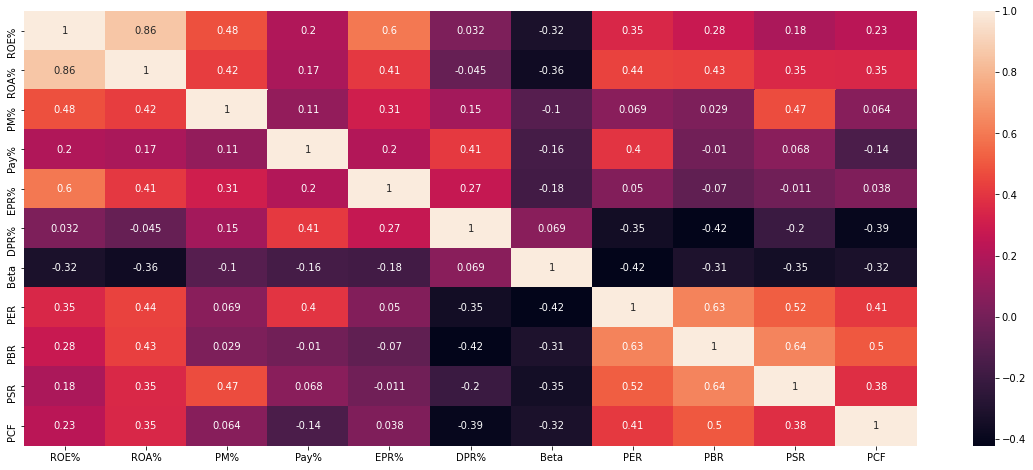

In [8]:
plt.figure(figsize=(20,8))
sns.heatmap(activ.corr(), annot = True)
plt.savefig("matrice corrélation des variables actives.png")

In [9]:
valo = sbf110[['PER', 'PBR', 'PSR', 'PCF', 'Sector']]
valorisation = valo.groupby("Sector").describe()
valorisation.to_excel("stat desc. valorisation par secteur.xlsx")
valorisation

PER                                   \
                                count       mean        std        min   
Sector                                                                   
Biens d'équipement               10.0  13.246888   4.934513   8.971698   
Biens de consommation cycliques  10.0  10.591772  19.513802 -35.538462   
Consommateur/Non cycliques        5.0  36.556088  22.821441  12.230179   
Energie                           4.0   7.009621   6.284638  -0.700441   
Finance                          12.0  13.160589  11.339968   3.892857   
Fournisseurs de services          3.0  21.080420  13.746432   5.295181   
Matériaux de base                 8.0   1.077485  20.311887 -35.769912   
Santé                             8.0  31.635278  16.522817  -2.278409   
Services                         33.0  13.917900  12.518637 -18.322440   
Technologie                      13.0  24.859229  15.982444   4.972973   
Transport                         4.0  21.512215  14.635513   5.828125   

                                                                             \
                                       25%        50%        75%        max   
Sector                                                                        
Biens d'équipement                9.830939  11.301853  14.692856  22.470588   
Biens de consommation cycliques   8.768474  11.275103  16.982703  42.100955   
Consommateur/Non cycliques       19.796610  35.820896  44.512195  70.420561   
Energie                           3.660604   7.383903  10.732921  13.971119   
Finance                           4.702592   8.530148  17.330513  33.228070   
Fournisseurs de services         16.412296  27.529412  28.973039  30.416667   
Matériaux de base                -7.698429   5.041692  15.227551  25.220588   
Santé                            26.889582  34.392363  39.345452  53.506494   
Services                          7.716907  11.369369  17.603175  44.414286   
Technologie                      15.244898  17.828283  36.734694  55.540541   
Transport                        13.910649  19.727035  27.328601  40.766667   

                                  PBR                                          \
                                count      mean       std       min       25%   
Sector                                                                          
Biens d'équipement               10.0  1.524890  0.582755  0.757958  1.024933   
Biens de consommation cycliques  10.0  2.681192  2.957453  0.207664  1.050898   
Consommateur/Non cycliques        5.0  3.806259  1.749829  1.550584  2.320222   
Energie                           4.0  0.889821  0.573904  0.421407  0.451803   
Finance                          12.0  1.349853  2.115893  0.203286  0.345389   
Fournisseurs de services          3.0  1.549581  1.524284  0.607044  0.670293   
Matériaux de base                 8.0  1.316127  0.851196  0.318850  0.910160   
Santé                             8.0  2.632907  1.678178  1.042730  1.597117   
Services                         33.0  1.967692  2.403560  0.346536  0.777618   
Technologie                      13.0  2.938353  1.980662  0.757202  2.050835   
Transport                         4.0  2.331538  2.269623 -0.622705  1.367815   

                                                                 PSR  \
                                      50%       75%        max count   
Sector                                                                 
Biens d'équipement               1.504013  1.961151   2.528090  10.0   
Biens de consommation cycliques  1.651677  2.894598  10.183138  10.0   
Consommateur/Non cycliques       4.631416  5.171803   5.357270   5.0   
Energie                          0.748329  1.186347   1.641221   4.0   
Finance                          0.526332  0.930366   7.551963  12.0   
Fournisseurs de services         0.733542  2.020850   3.308157   3.0   
Matériaux de base                1.037210  1.492946   3.092478   8.0   
Santé                            2.

In [11]:
struct = sbf110[['ROE', 'ROA', 'DtoE', 'Lev', 'FiLev','Beta', 'EPR', 'DPR', 'CFP', 'BMR']]
stfin = struct.describe()
stfin.to_excel("stat02 structure financière et rendement des actions sans outliers.xlsx")
stfin

,ROE,ROA,DtoE,Lev,FiLev,Beta,EPR,DPR,CFP,BMR
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,0.032146,0.015599,1.469618,0.002099,-0.026012,1.093455,0.052734,0.040286,0.267242,0.963371
std,0.193577,0.054251,1.218427,0.054251,0.142105,0.470425,0.169264,0.038205,1.248781,0.934290
min,-1.240800,-0.241600,0.075200,-0.255100,-0.972996,-0.090000,-1.427673,0.000000,-2.279149,-1.605898
25%,0.016800,0.001350,0.642675,-0.012150,-0.019341,0.790000,0.032533,0.013940,0.054450,0.424146
50%,0.070800,0.020750,1.174800,0.007250,0.005566,1.040000,0.065323,0.031242,0.118461,0.689825
75%,0.117250,0.040125,1.819750,0.026625,0.025352,1.315000,0.103346,0.056797,0.223388,1.265016
max,0.410900,0.145900,6.673500,0.132400,0.150460,2.740000,0.262463,0.183424,12.096330,4.919178


<h3>2.4.1 PCA pour la sélection de caractéristiques</h3>

In [12]:
n = activ.shape[0]
print("le nombre d'observation est: ", n)
v = activ.shape[1]
print("le nombre de variable est: ", v)

le nombre d'observation est:  110
le nombre de variable est:  11


In [13]:
#instanciation
acp = PCA()

In [14]:
# Intentiation
cr = preprocessing.StandardScaler()

# transformation de nos données
activ_cr = cr.fit_transform(activ)

In [15]:
#calculs
coord = acp.fit_transform(activ_cr)

In [16]:
#nombre de composantes calculées
print("Le nombre de composantes principales est: ", acp.n_components_)

Le nombre de composantes principales est:  11


In [17]:
print("Les variances expliquées sont:\n ", acp.singular_values_**2/n)

Les variances expliquées sont:
  [3.84647066 2.27183849 1.25130306 1.01627931 0.73345867 0.53834099
 0.47083508 0.45804153 0.1748689  0.15855598 0.08000731]


**Nous constatons à préalable, que nous dévrions choisir 4 variables pour le clustering**

In [18]:
print("Les proportions de variance expliquée sont:\n ", acp.explained_variance_ratio_)

Les proportions de variance expliquée sont:
  [0.34967915 0.20653077 0.11375482 0.09238903 0.06667806 0.04894009
 0.04280319 0.04164014 0.01589717 0.01441418 0.00727339]


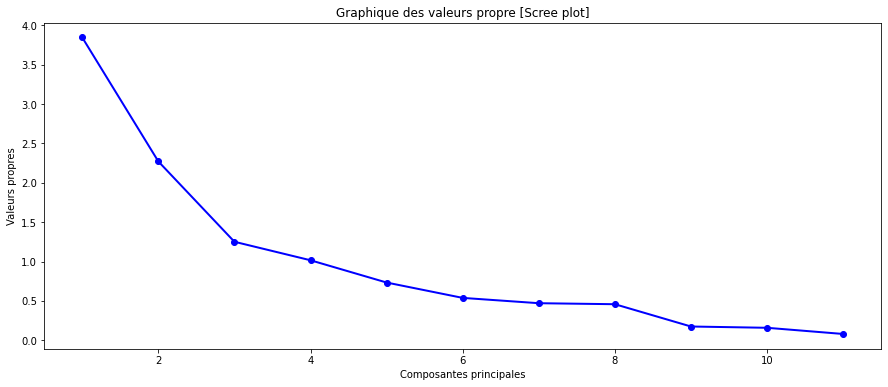

In [19]:
var_expl = acp.singular_values_**2/n
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,v+1),var_expl, "bo-", linewidth=2)
plt.title("Graphique des valeurs propre [Scree plot]")
plt.ylabel("Valeurs propres")
plt.xlabel("Composantes principales")
plt.savefig("screeplot 10var.png")
plt.show()

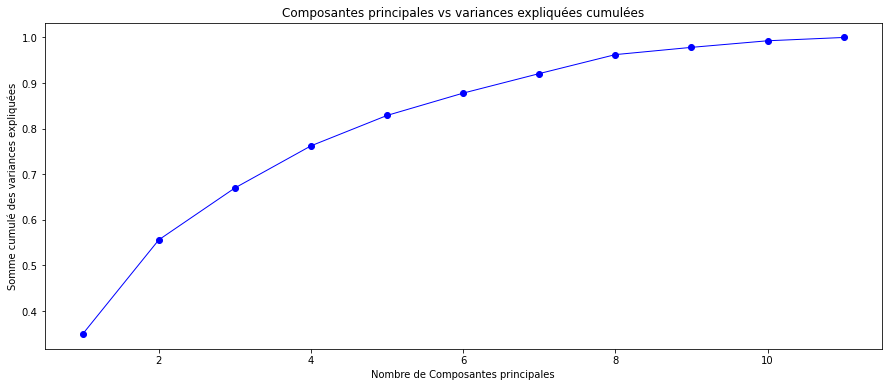

In [20]:
#cumul de variance expliquée
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,v+1),np.cumsum(acp.explained_variance_ratio_), "bo-", linewidth=1)
plt.title("Composantes principales vs variances expliquées cumulées")
plt.ylabel("Somme cumulé des variances expliquées")
plt.xlabel("Nombre de Composantes principales")
plt.savefig("variances expliquées 10var.png")
plt.show()

In [21]:
#seuils pour test des bâtons brisés
bs = 1/(np.arange(v,0,-1))
bs = np.cumsum(bs)
bs = bs[::-1]

#test des bâtons brisés
valpropres = pd.DataFrame({'Val.Propre':var_expl,'Seuils':bs})
valpropres.to_excel("ACP valeurs propres.xlsx")
valpropres

,Val.Propre,Seuils
0,3.846471,3.019877
1,2.271838,2.019877
2,1.251303,1.519877
3,1.016279,1.186544
4,0.733459,0.936544
5,0.538341,0.736544
6,0.470835,0.569877
7,0.458042,0.427020
8,0.174869,0.302020
9,0.158556,0.190909


In [22]:
#coordonnées factorielles des individus
coord_fact = pd.DataFrame(coord, index=activ.index, columns=np.arange(1,v+1))
coord_fact.to_excel("ACP coordeonnées factorielles individus.xlsx")
print("Coordonnées factorielles des individus\n", coord_fact)

Coordonnées factorielles des individus
              1         2         3         4         5         6         7   \
Tick                                                                          
ACCP   1.670092  0.621085  1.367095  1.032947 -0.661375 -0.188584 -1.572315   
ADP    0.137681  0.990601 -0.563151  0.263425 -0.241874 -0.254129 -0.803849   
AIRF   1.722030 -0.001410 -0.980954 -0.765627 -0.693465  0.538251 -1.944575   
AIRP  -1.364698  0.254938  0.178581 -0.201456 -0.009831  0.381493  0.094533   
AKA    0.765202 -1.104972 -1.592445 -0.482540  1.677885 -0.447812  0.037722   
ABIO  -1.416561  0.525887  0.350797 -0.260490 -0.202477  0.715528 -0.148901   
ALDA   0.532685 -1.229315 -0.274800 -0.502400 -0.227568  0.033946  0.228940   
ALSO  -0.950491  0.768808 -0.393600 -0.771615 -0.443845  0.557062 -0.102650   
LTEN  -0.593963  0.105934 -1.187239 -0.649439  0.855581  0.327731  0.320628   
AMUN  -0.526817 -0.380916 -0.365142  0.330171  0.259620 -1.229843  0.082117   
APAM   0.762

In [23]:
#contribution des individus dans l'inertie totale
di = np.sum(activ_cr**2,axis=1)
contri = pd.DataFrame({'ID':activ.index,'d_i':di})
contri.to_excel("ACP contri des ind l'inertie totale.xlsx")
contri

,ID,d_i
0,ACCP,9.934013
1,ADP,2.174257
2,AIRF,13.627500
3,AIRP,2.223630
4,AKA,7.917961
5,ABIO,3.070928
6,ALDA,2.274320
7,ALSO,2.935020
8,LTEN,3.500170
9,AMUN,2.962133


In [24]:
#qualité de représentation des individus - COS2 sur les neuf premiers facteurs
cos2 = coord**2
for j in range(v):
    cos2[:,j] = cos2[:,j]/di

quali = pd.DataFrame({'id':activ.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2], 'COS2_4':cos2[:,3], 
                      'COS2_5':cos2[:,4], 'COS2_6':cos2[:,5], 'COS2_7':cos2[:,6], 'COS2_8':cos2[:,7], 'COS2_9':cos2[:,8],
                     'COS2_10':cos2[:,9]})
quali.to_excel("ACP COS2 qualité de représent individus.xlsx")
quali

,id,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6,COS2_7,COS2_8,COS2_9,COS2_10
0,ACCP,0.280773,3.883087e-02,0.188136,0.107407,0.044032,0.003580,0.248860,0.035761,1.997811e-02,0.029845
1,ADP,0.008718,4.513227e-01,0.145861,0.031916,0.026907,0.029703,0.297193,0.000012,2.316964e-03,0.003412
2,AIRF,0.217603,1.458950e-07,0.070612,0.043015,0.035288,0.021259,0.277481,0.001801,2.080179e-02,0.047450
3,AIRP,0.837550,2.922853e-02,0.014342,0.018252,0.000043,0.065450,0.004019,0.012543,9.891227e-04,0.017568
4,AKA,0.073950,1.542017e-01,0.320270,0.029407,0.355558,0.025327,0.000180,0.004135,1.422927e-02,0.017816
5,ABIO,0.653433,9.005664e-02,0.040072,0.022096,0.013350,0.166719,0.007220,0.000050,1.694176e-05,0.003477
6,ALDA,0.124764,6.644692e-01,0.033203,0.110981,0.022770,0.000507,0.023046,0.006260,2.383044e-04,0.000942
7,ALSO,0.307811,2.013841e-01,0.052784,0.202857,0.067120,0.105729,0.003590,0.008116,1.759390e-02,0.032911
8,LTEN,0.100793,3.206143e-03,0.402705,0.120500,0.209138,0.030686,0.029371,0.025432,8.837957e-03,0.049180
9,AMUN,0.093695,4.898394e-02,0.045011,0.036802,0.022755,0.510617,0.002276,0.150365,2.320063e-03,0.060406


In [25]:
#contributions aux axes
ctr = coord**2
for j in range(v):
    ctr[:,j] = ctr[:,j]/(n*var_expl[j])
    
contrib=pd.DataFrame({'id':activ.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1], 'CTR_3':ctr[:,2], 'CTR_4':ctr[:,3], 'CTR_5':ctr[:,4],
                      'CTR_6':ctr[:,5], 'CTR_7':ctr[:,6], 'CTR_8':ctr[:,7], 'CTR_9':ctr[:,8], 'CTR_10':ctr[:,9]})
contrib.to_excel("ACP contribution aux axes.xlsx")
contrib

,id,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6,CTR_7,CTR_8,CTR_9,CTR_10
0,ACCP,6.592128e-03,1.543589e-03,1.357820e-02,9.544433e-03,0.005422,6.005629e-04,4.773290e-02,7.050751e-03,1.031748e-02,0.016999
1,ADP,4.480158e-05,3.926701e-03,2.304063e-03,6.207365e-04,0.000725,1.090584e-03,1.247634e-02,5.178323e-07,2.618935e-04,0.000425
2,AIRF,7.008517e-03,7.955846e-09,6.991041e-03,5.243586e-03,0.005960,4.892367e-03,7.301091e-02,4.872292e-04,1.473709e-02,0.037075
3,AIRP,4.401677e-03,2.600754e-04,2.316934e-04,3.630414e-04,0.000001,2.457672e-03,1.725456e-04,5.535480e-04,1.143424e-04,0.002240
4,AKA,1.383877e-03,4.885762e-03,1.842358e-02,2.082867e-03,0.034894,3.386427e-03,2.747367e-05,6.498622e-04,5.857208e-03,0.008088
5,ABIO,4.742589e-03,1.106663e-03,8.940378e-04,6.069811e-04,0.000508,8.645770e-03,4.280872e-04,3.025272e-06,2.704724e-06,0.000612
6,ALDA,6.706334e-04,6.047227e-03,5.486283e-04,2.257844e-03,0.000642,1.945984e-05,1.012000e-03,2.825578e-04,2.817594e-05,0.000123
7,ALSO,2.135211e-03,2.365191e-03,1.125522e-03,5.325927e-03,0.002442,5.240301e-03,2.034499e-04,4.727754e-04,2.684527e-03,0.005538
8,LTEN,8.338048e-04,4.490575e-05,1.024049e-02,3.772863e-03,0.009073,1.813782e-03,1.984907e-03,1.766735e-03,1.608184e-03,0.009870
9,AMUN,6.559406e-04,5.806149e-04,9.686510e-04,9.751529e-04,0.000835,2.554168e-02,1.301987e-04,8.840036e-03,3.572721e-04,0.010259


In [26]:
#racine carrée des valeurs propres
sqrt_varexpl = np.sqrt(var_expl)

#corrélation des variables avec les axes
corvar = np.zeros((v,v))

for k in range(v):
    corvar[:,k] = acp.components_[k,:] * sqrt_varexpl[k]
    
#afficher la matrice des corrélations variables x facteurs    
corvar

array([[-7.24447052e-01, -4.93358818e-01, -2.73246438e-01,
        -2.15929930e-01,  1.74937551e-01,  1.39064332e-01,
         9.66062931e-02,  6.92418469e-02,  3.82944313e-02,
        -6.63476725e-02,  2.01361551e-01],
       [-8.09471840e-01, -3.02991052e-01, -2.05362327e-01,
        -1.36733449e-01,  1.69977186e-01,  1.24627629e-01,
         2.80372406e-01,  1.01359823e-01, -1.03995181e-01,
         1.71341936e-01, -1.36389863e-01],
       [-4.46775032e-01, -4.42950541e-01, -2.98052953e-01,
         6.38551245e-01, -3.51997792e-02,  4.00761872e-02,
        -1.60725441e-01,  2.18147235e-01,  9.72942424e-02,
        -1.27971135e-01, -7.41272148e-02],
       [-2.25788440e-01, -4.61655018e-01,  7.82912080e-01,
        -7.08389141e-03,  1.79755769e-01, -1.15693427e-01,
        -8.45452142e-02,  1.60577881e-01,  1.69821051e-01,
         1.23898484e-01,  8.51112798e-03],
       [-3.44757637e-01, -6.73683060e-01, -2.23006205e-01,
        -2.84803010e-01, -6.32612855e-02, -1.98752290e-01,
  

In [27]:
print("Contribution des variables aux axes factorielles")
contri_var = pd.DataFrame({'id':activ.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],
                           'COR_5':corvar[:,4],'COR_6':corvar[:,5], 'COR_7':corvar[:,6],'COR_8':corvar[:,7], 
                           'COR_9':corvar[:,8], 'COR_10':corvar[:,9]})
contri_var.to_excel("ACP Contrib des var aux axes factorielles.xlsx")
contri_var

Contribution des variables aux axes factorielles


,id,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6,COR_7,COR_8,COR_9,COR_10
0,ROE%,-0.724447,-0.493359,-0.273246,-0.215930,0.174938,0.139064,0.096606,0.069242,0.038294,-0.066348
1,ROA%,-0.809472,-0.302991,-0.205362,-0.136733,0.169977,0.124628,0.280372,0.101360,-0.103995,0.171342
2,PM%,-0.446775,-0.442951,-0.298053,0.638551,-0.035200,0.040076,-0.160725,0.218147,0.097294,-0.127971
3,Pay%,-0.225788,-0.461655,0.782912,-0.007084,0.179756,-0.115693,-0.084545,0.160578,0.169821,0.123898
4,EPR%,-0.344758,-0.673683,-0.223006,-0.284803,-0.063261,-0.198752,-0.343220,-0.363576,0.002379,0.027756
5,DPR%,0.258580,-0.744285,0.281567,0.166244,-0.195285,-0.238955,0.368531,-0.110524,-0.115509,-0.125076
6,Beta,0.579677,-0.010258,-0.231357,0.215008,0.692913,-0.281852,0.000844,-0.037899,-0.052448,0.013827
7,PER,-0.750417,0.246039,0.439384,-0.104474,0.208570,0.042969,-0.199894,0.047815,-0.225346,-0.182372
8,PBR,-0.714116,0.478244,0.086750,0.041483,0.163293,-0.030239,0.231935,-0.333479,0.211478,-0.111103
9,PSR,-0.688220,0.247456,0.092669,0.586147,-0.115978,-0.049470,-0.038701,-0.206510,-0.111680,0.175668


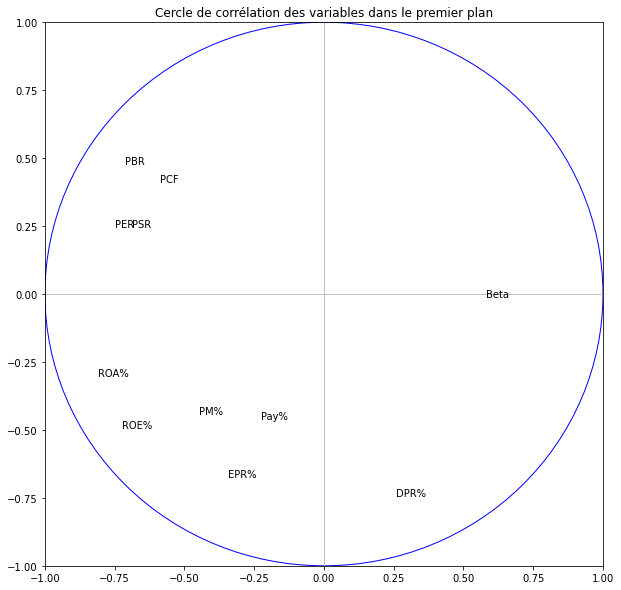

In [28]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(v):
    plt.annotate(activ.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.title("Cercle de corrélation des variables dans le premier plan")
plt.savefig("ACP cercle de corrélations 1er plan.png")
plt.show()

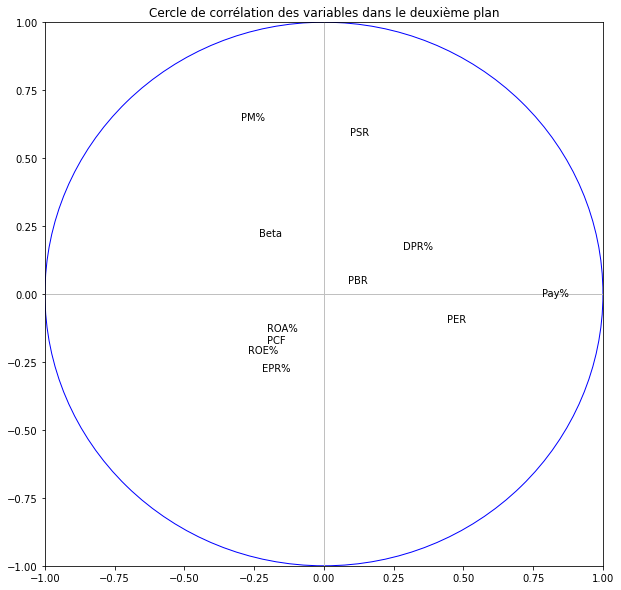

In [29]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(v):
    plt.annotate(activ.columns[j],(corvar[j,2],corvar[j,3]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='b',fill=False)
axes.add_artist(cercle)
plt.title("Cercle de corrélation des variables dans le deuxième plan")
plt.savefig("ACP cercle de corrélations 2e plan.png")
plt.show()

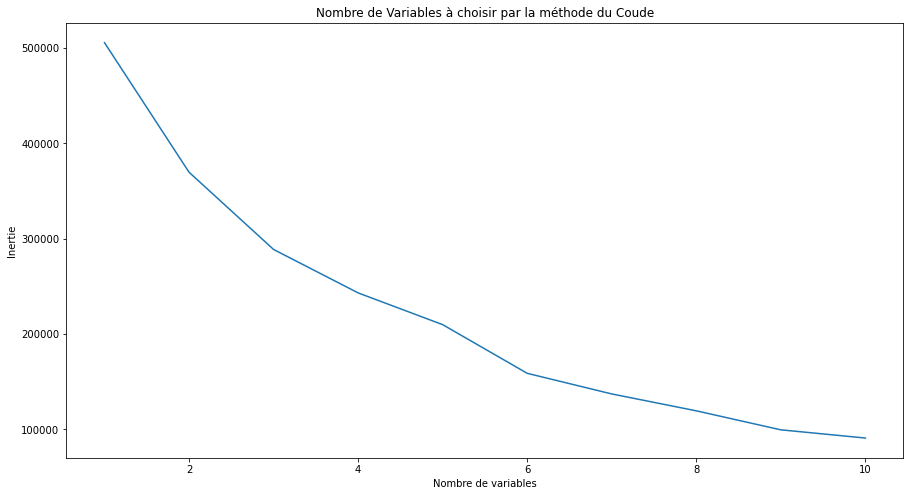

In [30]:
# Détermination du nombre de clusters sur les données originales
plt.figure(figsize=(15,8))

tab = []
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i)
    kmeans.fit(activ)
    tab.append(kmeans.inertia_)

plt.plot(range(1,11),tab)
plt.title("Nombre de Variables à choisir par la méthode du Coude")
plt.xlabel("Nombre de variables")
plt.ylabel("Inertie")
plt.savefig("ACP méthode du coude elboy.png")
plt.show()

In [31]:
# faire varier le nombre de clusters de 2 à 10
sbf_res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(activ_cr)
    sbf_res[k] = metrics.silhouette_score(activ_cr,km.labels_)

print(sbf_res)

[0.26957006 0.29717836 0.2494242  0.20511794 0.20580397 0.18046214
 0.16349639 0.18570251 0.14988931]


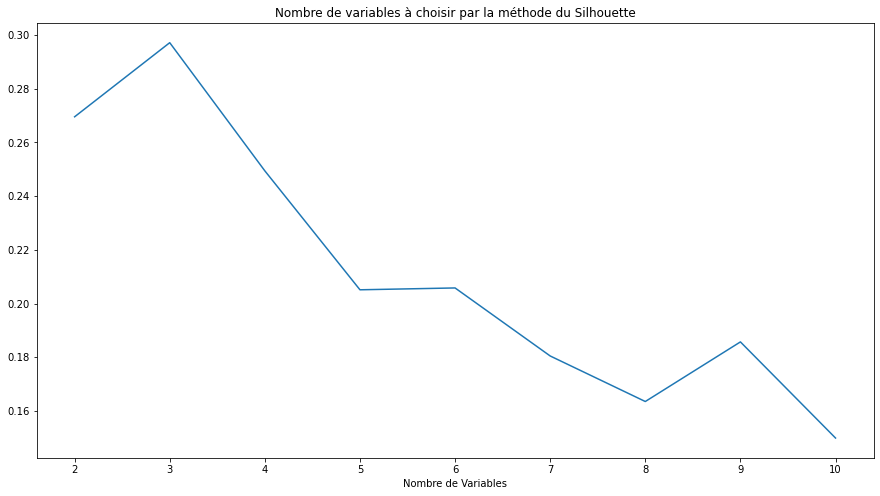

In [32]:
# graphique
plt.figure(figsize=(15,8))
plt.title("Nombre de variables à choisir par la méthode du Silhouette")
plt.xlabel("Nombre de Variables")
plt.plot(np.arange(2,11,1),sbf_res)
plt.savefig("ACP silhouette.png")
plt.show()

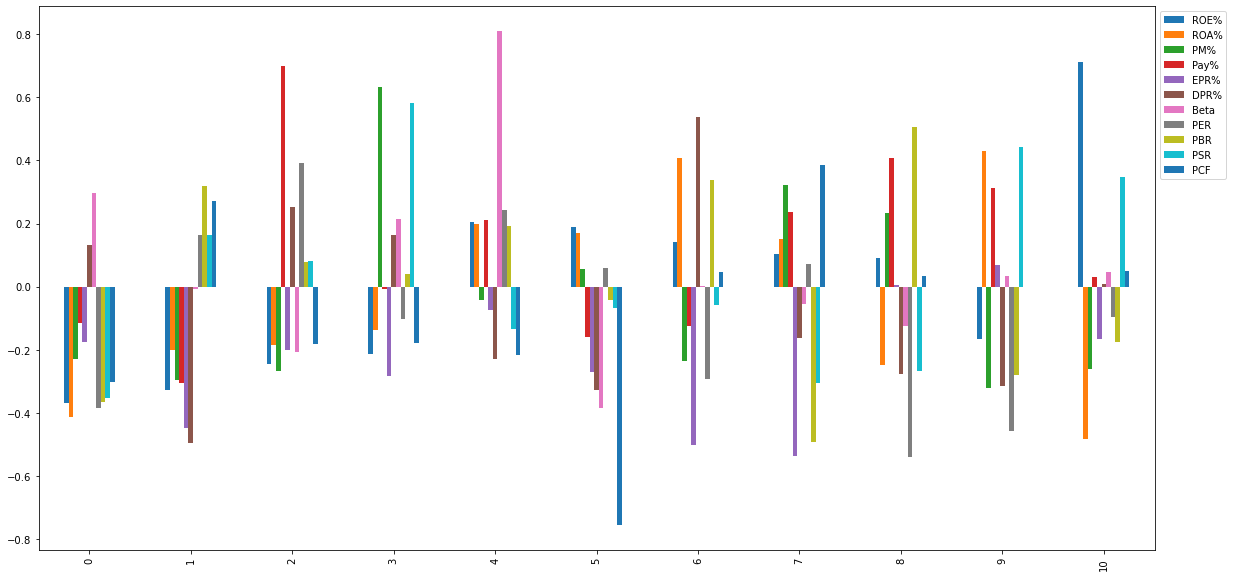

In [33]:
# Contribution des caractéristiques dans les composantes
fig, ax = plt.subplots(figsize=(20,10))
pd.DataFrame(acp.components_, columns=activ.columns).plot(kind="bar", ax=ax).legend(bbox_to_anchor=(1,1))
fig.savefig("ACP caractéristiques dans les composantes.png")

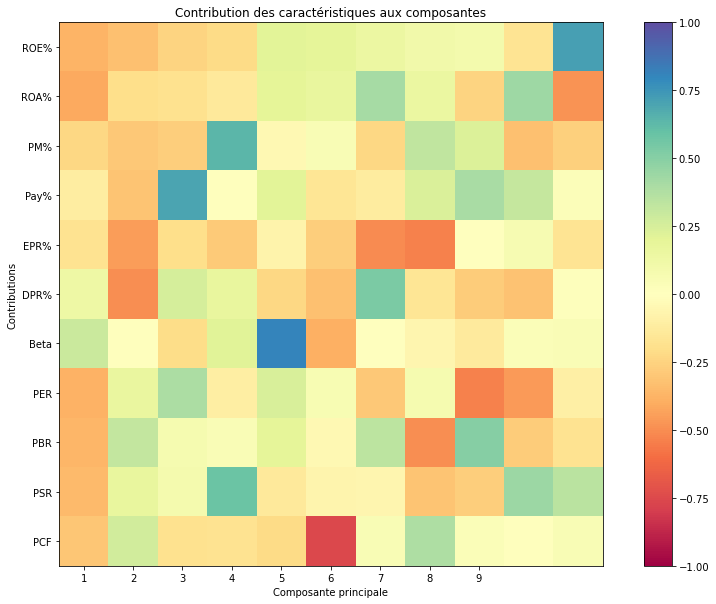

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
plt.imshow(acp.components_.T, cmap="Spectral", vmin=-1, vmax=1)
plt.yticks(range(len(activ.columns)), activ.columns)
plt.xticks(range(9), range(1,10))
plt.xlabel("Composante principale")
plt.ylabel("Contributions")
plt.title("Contribution des caractéristiques aux composantes")
plt.colorbar()
fig.savefig("ACP contri des caract aux composantes.png")

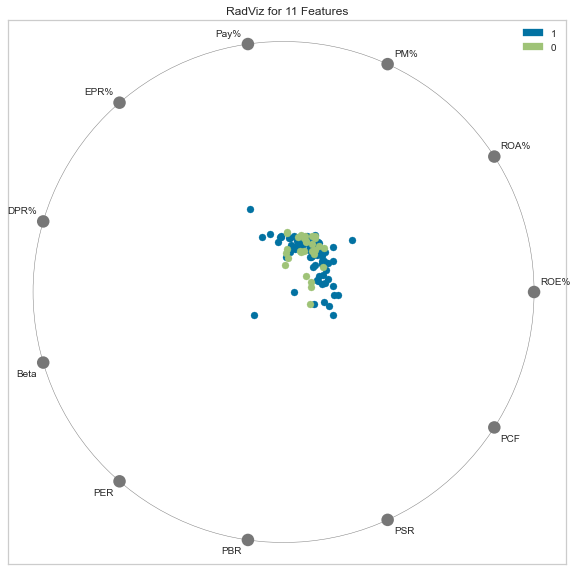

In [35]:
from yellowbrick.features import RadViz
fig, ax = plt.subplots(figsize=(10,10))
rv = RadViz(classes=[1,0], features=activ.columns)
rv.fit(activ_cr, sbf.Val)
_ = rv.transform(activ_cr)
rv.poof()
fig.savefig("ACP diagram circulaire avec RadViz.png")

In [36]:
activ.columns

Index(['ROE%', 'ROA%', 'PM%', 'Pay%', 'EPR%', 'DPR%', 'Beta', 'PER', 'PBR',
       'PSR', 'PCF'],
      dtype='object')

In [37]:
df = sbf[['PER', 'PBR', 'ROA%', 'DPR%']]
df = round(df,2)
print("la dimension de la base est de :",df.shape)
df.head()

la dimension de la base est de : (110, 4)


,PER,PBR,ROA%,DPR%
Tick,,,,
ACCP,18.48,1.53,-12.08,3.81
ADP,16.60,2.03,-2.22,0.78
AIRF,5.83,-0.62,-12.94,0.00
AIRP,25.22,3.09,5.39,2.25
AKA,4.97,0.76,5.12,3.86


In [38]:
stat04 = df.corr()
stat04.to_excel("Stat04 Matrice de corrélation des variables.xlsx")
stat04

,PER,PBR,ROA%,DPR%
PER,1.000000,0.631638,0.442441,-0.351976
PBR,0.631638,1.000000,0.430292,-0.422236
ROA%,0.442441,0.430292,1.000000,-0.044963
DPR%,-0.351976,-0.422236,-0.044963,1.000000


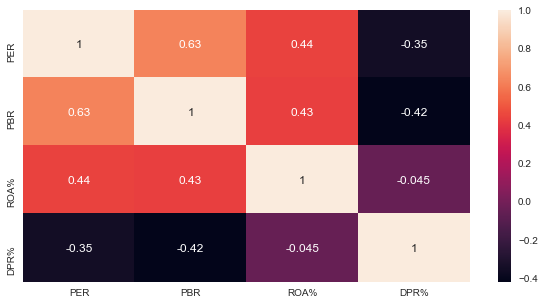

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(stat04, annot = True)
plt.savefig("matrice de Corrélation des variables de modélisation.png")

# 2. Modélisation sur les données centrées et réduites

In [40]:
# Intentiation
cr = preprocessing.StandardScaler()

# transformation de nos données
df01 = cr.fit_transform(df)
df01

array([[ 1.29684919e-01, -2.68385558e-01, -2.52571551e+00,
        -5.75098329e-02],
       [ 1.41910072e-02, -2.72287913e-02, -6.99929520e-01,
        -8.54185947e-01],
       [-6.47441666e-01, -1.30535966e+00, -2.68496257e+00,
        -1.05927089e+00],
       [ 5.43742878e-01,  4.84023555e-01,  7.09221737e-01,
        -4.67679713e-01],
       [-7.00273987e-01, -6.39766980e-01,  6.59225569e-01,
        -4.43633623e-02],
       [ 8.63194122e-01,  5.90132532e-01,  3.75913950e-01,
        -6.38583830e-01],
       [-5.96452333e-01, -5.38481137e-01,  7.40852310e-02,
         7.18131928e-01],
       [ 3.98146830e-01,  5.08139231e-01,  2.03704926e-01,
        -8.56815241e-01],
       [-6.93577798e-02,  8.37033215e-02,  1.28140011e+00,
        -7.98970770e-01],
       [-1.99595595e-01, -3.55201995e-01,  3.59248560e-01,
         2.50117577e-01],
       [-1.48606262e-01, -5.43304273e-01,  2.49997674e-01,
         7.54942045e-01],
       [-1.29125879e+00, -8.51984935e-01, -1.15915358e+00,
      

In [41]:
# Génération de la matrice des liens
z01 = linkage(df01,method='ward',metric='euclidean')

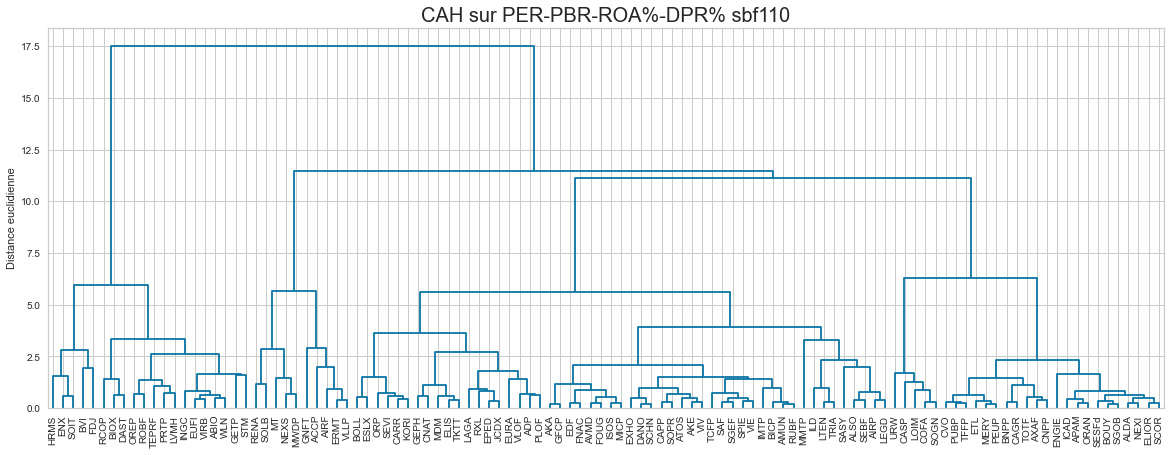

In [42]:
# Affichage du dendrogram 
plt.figure(figsize=(20,7))
plt.title("CAH sur PER-PBR-ROA%-DPR% sbf110", fontsize=20)
plt.ylabel("Distance euclidienne")
dendrogram(z01, labels=list(df.index), leaf_font_size=10, color_threshold=0)
plt.savefig("CAH01 sur PER-PBR-ROA%-DPR% CR sbf110.png")
plt.show()

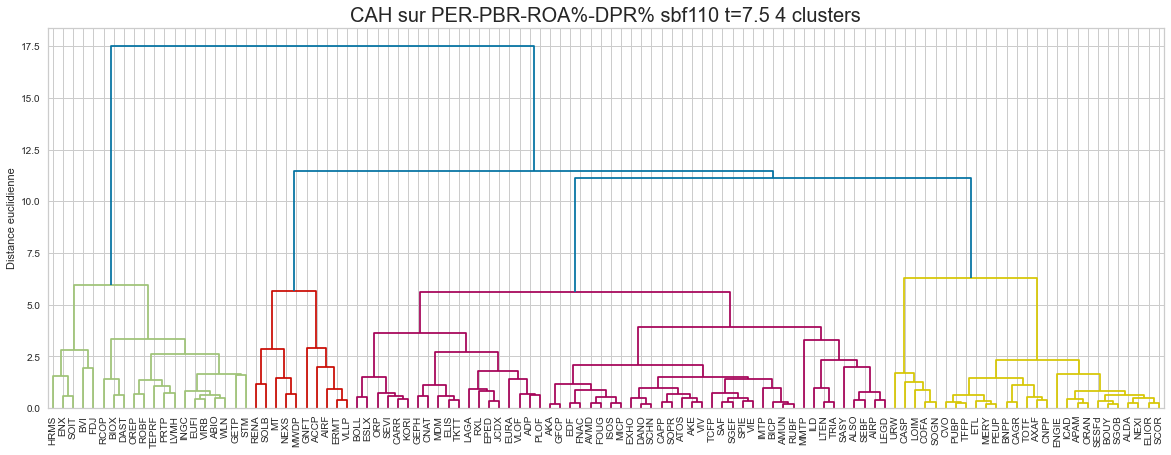

In [43]:
# Affichage du dendrogram 
plt.figure(figsize=(20,7))
plt.title("CAH sur PER-PBR-ROA%-DPR% sbf110 t=7.5 4 clusters", fontsize=20)
plt.ylabel("Distance euclidienne")
dendrogram(z01, labels=list(df.index), leaf_font_size=10, color_threshold=7.5)
plt.savefig("CAH01 sur PER-PBR-ROA%-DPR% CR sbf110 t7-5.png")
plt.show()

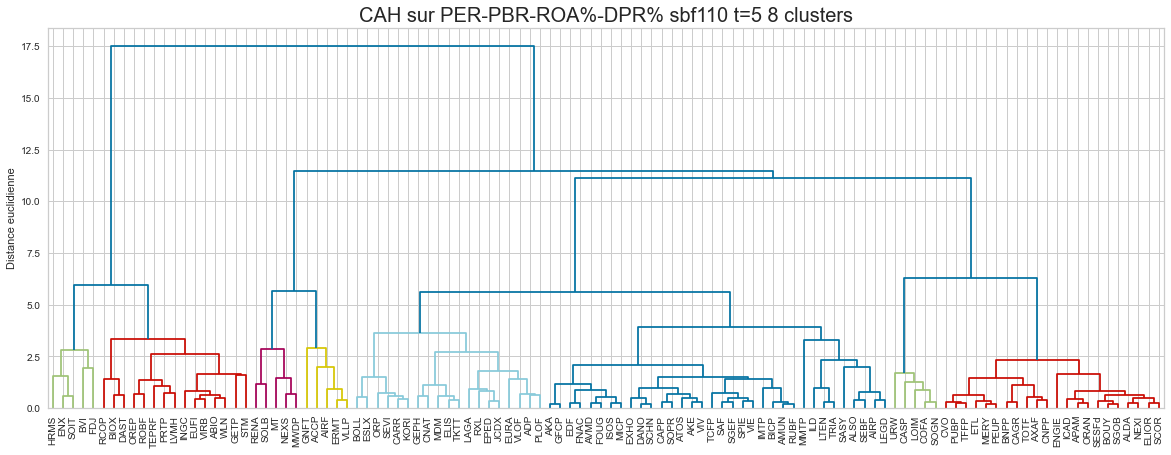

In [46]:
# Affichage du dendrogram 
plt.figure(figsize=(20,7))
plt.title("CAH sur PER-PBR-ROA%-DPR% sbf110 t=5 8 clusters", fontsize=20)
plt.ylabel("Distance euclidienne")
dendrogram(z01, labels=list(df.index), leaf_font_size=10, color_threshold=5)
plt.savefig("CAH02 sur PER-PBR-ROA%-DPR% CR sbf110 t5.png")
plt.show()

In [44]:
# Identifiants des groupes obtenus à t=7.5
cah01 = fcluster(z01, t=7.5, criterion="distance")
cah01

array([2, 3, 2, 3, 3, 1, 4, 3, 3, 3, 4, 2, 3, 3, 4, 1, 4, 3, 4, 1, 3, 3,
       4, 3, 4, 4, 4, 3, 3, 1, 3, 3, 4, 3, 2, 3, 3, 1, 1, 4, 3, 4, 4, 4,
       3, 2, 1, 3, 1, 4, 3, 3, 1, 3, 3, 1, 4, 3, 1, 1, 1, 3, 3, 3, 3, 4,
       3, 3, 2, 4, 3, 4, 3, 4, 1, 2, 3, 1, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4,
       3, 1, 2, 3, 3, 1, 3, 3, 1, 4, 3, 4, 3, 4, 3, 2, 3, 3, 1, 3, 2, 1],
      dtype=int32)

In [45]:
np.unique(cah01, return_counts=True)

(array([1, 2, 3, 4], dtype=int32), array([20, 10, 53, 27], dtype=int64))

In [47]:
cah02 = fcluster(z01, t=5, criterion="distance")
cah02

array([4, 5, 4, 6, 6, 2, 8, 6, 6, 6, 8, 3, 6, 6, 8, 2, 8, 5, 8, 1, 6, 5,
       7, 5, 8, 7, 8, 6, 6, 2, 6, 6, 8, 5, 4, 5, 5, 2, 1, 8, 5, 8, 8, 8,
       6, 4, 2, 6, 1, 8, 6, 6, 2, 6, 5, 2, 7, 5, 2, 2, 1, 5, 6, 6, 5, 8,
       6, 5, 3, 8, 5, 8, 5, 8, 2, 3, 5, 2, 6, 6, 8, 6, 6, 8, 6, 8, 6, 7,
       6, 1, 3, 6, 6, 2, 5, 5, 2, 8, 6, 8, 6, 7, 5, 4, 6, 6, 2, 6, 3, 2],
      dtype=int32)

In [48]:
np.unique(cah02, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([ 5, 15,  5,  5, 19, 34,  5, 22], dtype=int64))

In [50]:
sbf["cah01"] = cah01
sbf["cah02"] = cah02
sbf.head(2)

,Valued,Val,Stock,L52w,H52w,Price,IVgn,IVdcf,BVPS,EPS,Div,CFPS,TBVPS,RevPS,MoS,ROE,ROA,DtoE,Lev,FiLev,Beta,EPR,DPR,CFP,PM,TSR,Payout,BMR,PER,PBR,PSR,PCF,Ind,Sector,Industry,Shares,Empl,MCap€M,BV€M,TBV€M,Rev€M,Ear€M,CF€M,ROE%,ROA%,TSR%,PM%,Pay%,EPR%,DPR%,cah01,cah02
Tick,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCP,Overvalued,0,Accor SA (ACCP),21.06,42.58,27.53,25.187558,-4.664286,18.04,1.49,1.05,-4.16,1.31,11.30,-0.093000,-0.2720,-0.1208,0.7631,-0.1343,-0.102484,1.06,0.054123,0.038140,-0.151108,0.131858,1.071700,0.704698,0.655285,18.476510,1.526053,2.436283,-6.617788,cac 40,Services,Hôtels et motels,270932350,196020,7458.768,4887.620,354.921,3061.536,403.689,-1127.079,-27.20,-12.08,107.17,13.19,70.47,5.41,3.81,2,4
ADP,Overvalued,0,Aeroports de Paris SA (ADP),70.70,181.50,89.50,27.548482,6.283649,44.06,5.39,0.70,5.30,13.53,37.22,-2.248818,-0.0508,-0.0222,2.1257,-0.0357,-0.075887,1.14,0.060223,0.007821,0.059218,0.144815,1.577086,0.129870,0.492291,16.604824,2.031321,2.404621,16.886792,cac mid 60,Transport,Transports (divers),98944352,26122,8855.520,4359.488,1338.717,3682.709,533.310,524.405,-5.08,-2.22,157.71,14.48,12.99,6.02,0.78,3,5


In [51]:
sbf["cah01"].replace(1,"cluster_1", inplace=True)
sbf["cah01"].replace(2,"cluster_2", inplace=True)
sbf["cah01"].replace(3,"cluster_3", inplace=True)
sbf["cah01"].replace(4,"cluster_4", inplace=True)

sbf["cah02"].replace(1,"cluster_1", inplace=True)
sbf["cah02"].replace(2,"cluster_2", inplace=True)
sbf["cah02"].replace(3,"cluster_3", inplace=True)
sbf["cah02"].replace(4,"cluster_4", inplace=True)
sbf["cah02"].replace(5,"cluster_5", inplace=True)
sbf["cah02"].replace(6,"cluster_6", inplace=True)
sbf["cah02"].replace(7,"cluster_7", inplace=True)
sbf["cah02"].replace(8,"cluster_8", inplace=True)
sbf.head(3)

,Valued,Val,Stock,L52w,H52w,Price,IVgn,IVdcf,BVPS,EPS,Div,CFPS,TBVPS,RevPS,MoS,ROE,ROA,DtoE,Lev,FiLev,Beta,EPR,DPR,CFP,PM,TSR,Payout,BMR,PER,PBR,PSR,PCF,Ind,Sector,Industry,Shares,Empl,MCap€M,BV€M,TBV€M,Rev€M,Ear€M,CF€M,ROE%,ROA%,TSR%,PM%,Pay%,EPR%,DPR%,cah01,cah02
Tick,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCP,Overvalued,0,Accor SA (ACCP),21.06,42.58,27.53,25.187558,-4.664286,18.04,1.49,1.05,-4.16,1.31,11.30,-0.093000,-0.2720,-0.1208,0.7631,-0.1343,-0.102484,1.06,0.054123,0.038140,-0.151108,0.131858,1.071700,0.704698,0.655285,18.476510,1.526053,2.436283,-6.617788,cac 40,Services,Hôtels et motels,270932350,196020,7458.768,4887.620,354.921,3061.536,403.689,-1127.079,-27.20,-12.08,107.17,13.19,70.47,5.41,3.81,cluster_2,cluster_4
ADP,Overvalued,0,Aeroports de Paris SA (ADP),70.70,181.50,89.50,27.548482,6.283649,44.06,5.39,0.70,5.30,13.53,37.22,-2.248818,-0.0508,-0.0222,2.1257,-0.0357,-0.075887,1.14,0.060223,0.007821,0.059218,0.144815,1.577086,0.129870,0.492291,16.604824,2.031321,2.404621,16.886792,cac mid 60,Transport,Transports (divers),98944352,26122,8855.520,4359.488,1338.717,3682.709,533.310,524.405,-5.08,-2.22,157.71,14.48,12.99,6.02,0.78,cluster_3,cluster_5
AIRF,Overvalued,0,Air France - KLM SA (AIRF),3.26,11.11,3.73,9.036426,-2.601564,-5.99,0.64,0.00,-2.03,-9.49,44.76,0.587226,0.2197,-0.1294,4.1243,-0.1429,-0.589362,0.99,0.171582,0.000000,-0.544236,0.014298,2.407975,0.000000,-1.605898,5.828125,-0.622705,0.083333,-1.837438,cac mid 60,Transport,Compagnies aériennes,427432464,83896,1594.323,-2560.320,-4056.334,19131.877,273.557,-867.688,21.97,-12.94,240.80,1.43,0.00,17.16,0.00,cluster_2,cluster_4


In [52]:
croisement = pd.crosstab(sbf["cah01"], sbf["cah02"])
croisement.to_excel("croisement des clusters cah01 - cah02.xlsx")
croisement

cah02,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
cah01,,,,,,,,
cluster_1,5,15,0,0,0,0,0,0
cluster_2,0,0,5,5,0,0,0,0
cluster_3,0,0,0,0,19,34,0,0
cluster_4,0,0,0,0,0,0,5,22


In [53]:
clus01 = pd.crosstab(sbf["Valued"], sbf["cah01"])
clus01.to_excel("croisement cah01 et de la valorisation des actions.xlsx")
clus01

cah01,cluster_1,cluster_2,cluster_3,cluster_4
Valued,,,,
Overvalued,15,10,37,18
Undervalued,5,0,16,9


In [54]:
clus02 = pd.crosstab(sbf["Valued"], sbf["cah02"])
clus02.to_excel("croisement cah02 et de la valorisation des actions.xlsx")
clus02

cah02,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
Valued,,,,,,,,
Overvalued,3,12,5,5,7,30,4,14
Undervalued,2,3,0,0,12,4,1,8


In [55]:
df["cah01"] = sbf["cah01"]
df["cah02"] = sbf["cah02"]
df.head(2)

,PER,PBR,ROA%,DPR%,cah01,cah02
Tick,,,,,,
ACCP,18.48,1.53,-12.08,3.81,cluster_2,cluster_4
ADP,16.60,2.03,-2.22,0.78,cluster_3,cluster_5


In [56]:
car01 = df.groupby("cah01").describe()
car01.to_excel("cah01 caractéristiques des clusters.xlsx")
car01

PER                                                               \
          count       mean        std    min      25%     50%     75%    max   
cah01                                                                          
cluster_1  20.0  39.801500  11.449443  24.18  32.2350  37.590  44.435  70.42   
cluster_2  10.0  -9.364000  17.327950 -35.77 -17.9475  -4.255  -1.095  18.48   
cluster_3  53.0  16.325094   8.745341   3.89  10.0900  14.640  18.900  43.61   
cluster_4  27.0   8.628519   5.390145  -5.83   6.1800   8.160  10.765  27.53   

            PBR                                                          ROA%  \
          count      mean       std   min     25%    50%     75%    max count   
cah01                                                                           
cluster_1  20.0  5.695500  2.290237  2.99  3.8325  5.265  6.6425  11.10  20.0   
cluster_2  10.0  0.938000  0.841451 -0.62  0.3450  1.025  1.6425   1.93  10.0   
cluster_3  53.0  1.650189  0.742479  0.36  0.9800  1.550  2.1500   3.26  53.0   
cluster_4  27.0  0.694815  0.283744  0.20  0.4650  0.710  0.9500   1.33  27.0   

                                                                    DPR%  \
               mean       std    min     25%     50%    75%    max count   
cah01                                                                      
cluster_1  5.750500  3.257688   0.38   3.480   4.785  7.580  12.12  20.0   
cluster_2 -9.756000  6.877335 -24.16 -12.725 -10.585 -5.340  -0.88  10.0   
cluster_3  2.361887  3.939158  -5.53   0.550   2.190  4.070  14.59  53.0   
cluster_4  1.072593  1.977496  -5.84   0.295   1.060  2.555   3.94  27.0   

                                                                    
               mean       std   min     25%    50%      75%    max  
cah01                                                               
cluster_1  1.144500  0.954372  0.00  0.5125  0.895   1.6575   3.35  
cluster_2  1.861000  2.063258  0.00  0.0000  1.395   3.1800   5.95  
cluster_3  2.811698  1.676957  0.00  1.7900  2.870   3.7500   8.85  
cluster_4  9.357037  3.567418  5.42  6.8300  8.330  10.1050  18.34

In [57]:
car02 = df.groupby("cah02").describe()
car02.to_excel("cah02 caractéristiques des clusters.xlsx")
car02

PER                                                                \
          count       mean        std    min      25%     50%      75%    max   
cah02                                                                           
cluster_1   5.0  35.676000   8.220412  24.39  30.7500  36.730  42.1000  44.41   
cluster_2  15.0  41.176667  12.267668  24.18  32.9800  37.920  47.9200  70.42   
cluster_3   5.0 -22.222000  13.360313 -35.77 -35.5400 -18.320 -16.8300  -4.65   
cluster_4   5.0   3.494000   9.152146  -3.86  -2.2800  -0.700   5.8300  18.48   
cluster_5  19.0  19.831053  11.228195   3.89  12.1250  16.880  27.8350  43.61   
cluster_6  34.0  14.365882   6.380976   4.97   9.5125  14.085  17.4500  36.05   
cluster_7   5.0   4.996000   6.502298  -5.83   4.7700   6.950   7.7200  11.37   
cluster_8  22.0   9.454091   4.905318   3.81   6.7625   9.310  10.8325  27.53   

            PBR                                                          ROA%  \
          count      mean       std   min    25%    50%      75%    max count   
cah02                                                                           
cluster_1   5.0  8.902000  1.634264  7.55  7.580  8.100  10.1800  11.10   5.0   
cluster_2  15.0  4.626667  1.208037  2.99  3.485  4.780   5.6650   6.34  15.0   
cluster_3   5.0  1.050000  0.776756  0.21  0.320  1.110   1.6800   1.93   5.0   
cluster_4   5.0  0.826000  0.978969 -0.62  0.420  0.940   1.5300   1.86   5.0   
cluster_5  19.0  1.341053  0.586154  0.36  0.915  1.280   1.8350   2.32  19.0   
cluster_6  34.0  1.822941  0.771687  0.61  1.350  1.695   2.3050   3.26  34.0   
cluster_7   5.0  0.428000  0.171814  0.20  0.350  0.410   0.5300   0.65   5.0   
cluster_8  22.0  0.755455  0.270656  0.30  0.545  0.765   0.9675   1.33  22.0   

                                                                        DPR%  \
                mean       std    min      25%     50%      75%    max count   
cah02                                                                          
cluster_1   8.294000  4.953244   2.60   3.1500  11.670  11.9300  12.12   5.0   
cluster_2   4.902667  2.076575   0.38   3.7650   4.720   6.2700   8.13  15.0   
cluster_3  -4.616000  3.645008  -9.10  -7.2600  -4.700  -1.1400  -0.88   5.0   
cluster_4 -14.896000  5.204309 -24.16 -13.2300 -12.940 -12.0800 -12.07   5.0   
cluster_5  -1.146316  2.471332  -5.53  -2.8000  -0.790   0.6800   2.85  19.0   
cluster_6   4.322353  3.173895   0.55   2.2275   3.645   5.1075  14.59  34.0   
cluster_7  -1.166000  2.741173  -5.84  -1.0700  -0.200   0.0300   1.25   5.0   
cluster_8   1.581364  1.394982  -1.11   0.3850   1.595   2.7825   3.94  22.0   

                                                                        
                mean       std    min      25%     50%      75%    max  
cah02                                                                   
cluster_1   1.316000  1.035389   0.00   0.7400   1.450   1.6200   2.77  
cluster_2   1.087333  0.956985   0.00   0.5050   0.850   1.6850   3.35  
cluster_3   2.960000  1.911962   0.85   1.9400   2.730   3.3300   5.95  
cluster_4   0.762000  1.703884   0.00   0.0000   0.000   0.0000   3.81  
cluster_5   2.007368  1.624260   0.00   0.7500   1.840   3.1550   5.75  
cluster_6   3.261176  1.552950   0.77   2.2600   3.245   3.9500   8.85  
cluster_7  15.910000  1.885961  13.87  14.8400  15.070  17.4300  18.34  
cluster_8   7.867727  1.591004   5.42   6.6775   7.810   8.7825  11.59

In [60]:
fig = px.box(sbf, x="cah01", y="PER", hover_data=["DPR%","TSR%","PBR","ROA","ROE","CFP"], hover_name="Stock",
                labels={"PER":"Price-to-Earnings", "cah01":"Label des clusters cah01"},  points="all",
             title="Analyse des caractéristiques des clusters cah01 selon le PER")
fig.show()

In [61]:
fig = px.box(sbf, x="cah01", y="DPR%", hover_data=["PER","TSR%","PBR","ROA","ROE","CFP"], hover_name="Stock", points="all",
                labels={"DPR%":"Dividend Yield en %", "cah01":"Label des clusters cah01"}, 
             title="Analyse des caractéristiques des clusters cah01 par rapport au Dividend Yield% sbf110")
fig.show()

In [62]:
fig = px.box(sbf, x="cah01", y="TSR%", hover_data=["PER","DPR%","PBR","ROA","ROE","CFP"], hover_name="Stock", points="all",
                labels={"TSR%":"Total Shareholder Return en %", "cah01":"Label des clusters cah01"}, 
             title="Analyse des caractéristiques des clusters cah01 par rapport à la rentabilité totale de l'actionnaire TSR sbf110")
fig.show()

In [63]:
fig = px.box(sbf, x="cah01", y="EPR%", hover_data=["PER","TSR%","PBR","ROA","ROE","CFP"], hover_name="Stock", points="all",
                labels={"EPR%":"Earnings Yield en %", "cah01":"Label des clusters cah01"}, 
             title="Analyse des caractéristiques des clusters cah01 par rapport à l'Earnings Yield% sbf110")
fig.show()

In [64]:
fig = px.box(sbf, x="cah01", y="Pay%", hover_data=["PER","TSR%","PBR","ROA","ROE","CFP"], hover_name="Stock", points="all",
                labels={"Pay%":"Payout Ratio en %", "cah01":"Label des clusters cah01"}, 
             title="Analyse des caractéristiques des clusters cah01 par rapport Payout ratio% sbf110")
fig.show()

In [65]:
fig = px.box(sbf, x="cah01", y="PBR", hover_data=["PER","TSR%","EPR%","ROA","ROE","CFP"], hover_name="Stock", points="all",
                labels={"PBR":"Price-to-Book", "cah01":"Label des clusters cah01"}, 
             title="Analyse des caractéristiques des clusters cah01 par rapport au Price-to-Book ratio sbf110")
fig.show()

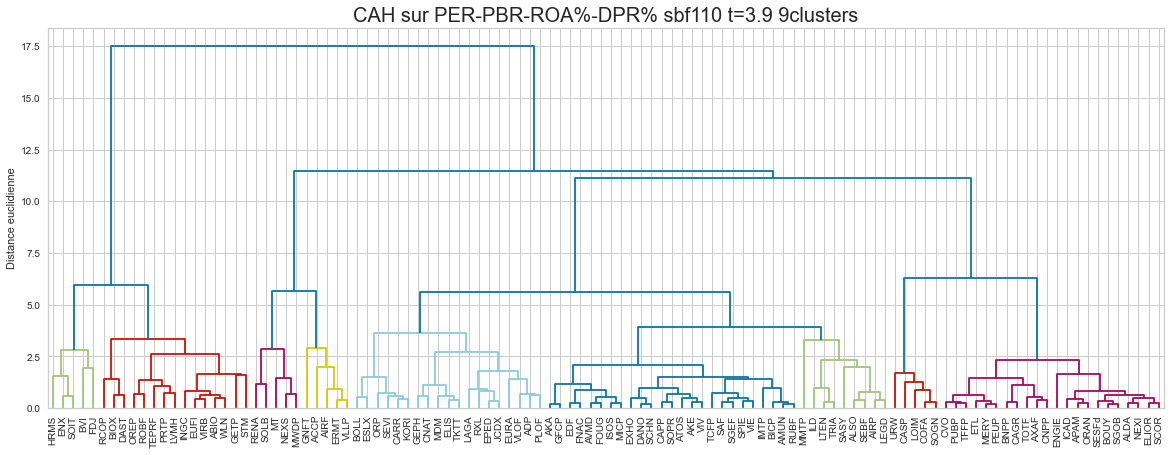

In [74]:
# Affichage du dendrogram 
plt.figure(figsize=(20,7))
plt.title("CAH sur PER-PBR-ROA%-DPR% sbf110 t=3.9 9clusters", fontsize=20)
plt.ylabel("Distance euclidienne")
dendrogram(z01, labels=list(df.index), leaf_font_size=10, color_threshold=3.9)
plt.savefig("CAH03 sur PER-PBR-ROA%-DPR% CR sbf110 t3.9 cluster.png")
plt.show()

In [72]:
cah03 = fcluster(z01, t=3.9, criterion="distance")
cah03

array([4, 5, 4, 7, 6, 2, 9, 7, 7, 6, 9, 3, 6, 6, 9, 2, 9, 5, 9, 1, 6, 5,
       8, 5, 9, 8, 9, 6, 6, 2, 6, 6, 9, 5, 4, 5, 5, 2, 1, 9, 5, 9, 9, 9,
       6, 4, 2, 6, 1, 9, 7, 6, 2, 6, 5, 2, 8, 5, 2, 2, 1, 5, 7, 7, 5, 9,
       6, 5, 3, 9, 5, 9, 5, 9, 2, 3, 5, 2, 6, 6, 9, 7, 6, 9, 7, 9, 6, 8,
       6, 1, 3, 6, 6, 2, 5, 5, 2, 9, 6, 9, 7, 8, 5, 4, 6, 6, 2, 6, 3, 2],
      dtype=int32)

In [73]:
np.unique(cah03, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([ 5, 15,  5,  5, 19, 25,  9,  5, 22], dtype=int64))

In [75]:
sbf["cah03"] = cah03

In [76]:
sbf["cah03"].replace(1,"cluster_1", inplace=True)
sbf["cah03"].replace(2,"cluster_2", inplace=True)
sbf["cah03"].replace(3,"cluster_3", inplace=True)
sbf["cah03"].replace(4,"cluster_4", inplace=True)
sbf["cah03"].replace(5,"cluster_5", inplace=True)
sbf["cah03"].replace(6,"cluster_6", inplace=True)
sbf["cah03"].replace(7,"cluster_7", inplace=True)
sbf["cah03"].replace(8,"cluster_8", inplace=True)
sbf["cah03"].replace(9,"cluster_9", inplace=True)
sbf.head(3)

,Valued,Val,Stock,L52w,H52w,Price,IVgn,IVdcf,BVPS,EPS,Div,CFPS,TBVPS,RevPS,MoS,ROE,ROA,DtoE,Lev,FiLev,Beta,EPR,DPR,CFP,PM,TSR,Payout,BMR,PER,PBR,PSR,PCF,Ind,Sector,Industry,Shares,Empl,MCap€M,BV€M,TBV€M,Rev€M,Ear€M,CF€M,ROE%,ROA%,TSR%,PM%,Pay%,EPR%,DPR%,cah01,cah02,cah03
Tick,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCP,Overvalued,0,Accor SA (ACCP),21.06,42.58,27.53,25.187558,-4.664286,18.04,1.49,1.05,-4.16,1.31,11.30,-0.093000,-0.2720,-0.1208,0.7631,-0.1343,-0.102484,1.06,0.054123,0.038140,-0.151108,0.131858,1.071700,0.704698,0.655285,18.476510,1.526053,2.436283,-6.617788,cac 40,Services,Hôtels et motels,270932350,196020,7458.768,4887.620,354.921,3061.536,403.689,-1127.079,-27.20,-12.08,107.17,13.19,70.47,5.41,3.81,cluster_2,cluster_4,cluster_4
ADP,Overvalued,0,Aeroports de Paris SA (ADP),70.70,181.50,89.50,27.548482,6.283649,44.06,5.39,0.70,5.30,13.53,37.22,-2.248818,-0.0508,-0.0222,2.1257,-0.0357,-0.075887,1.14,0.060223,0.007821,0.059218,0.144815,1.577086,0.129870,0.492291,16.604824,2.031321,2.404621,16.886792,cac mid 60,Transport,Transports (divers),98944352,26122,8855.520,4359.488,1338.717,3682.709,533.310,524.405,-5.08,-2.22,157.71,14.48,12.99,6.02,0.78,cluster_3,cluster_5,cluster_5
AIRF,Overvalued,0,Air France - KLM SA (AIRF),3.26,11.11,3.73,9.036426,-2.601564,-5.99,0.64,0.00,-2.03,-9.49,44.76,0.587226,0.2197,-0.1294,4.1243,-0.1429,-0.589362,0.99,0.171582,0.000000,-0.544236,0.014298,2.407975,0.000000,-1.605898,5.828125,-0.622705,0.083333,-1.837438,cac mid 60,Transport,Compagnies aériennes,427432464,83896,1594.323,-2560.320,-4056.334,19131.877,273.557,-867.688,21.97,-12.94,240.80,1.43,0.00,17.16,0.00,cluster_2,cluster_4,cluster_4


In [77]:
croisement3 = pd.crosstab(sbf["cah01"], sbf["cah03"])
croisement3.to_excel("croisement des clusters cah01 - cah03.xlsx")
croisement3

cah03,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
cah01,,,,,,,,,
cluster_1,5,15,0,0,0,0,0,0,0
cluster_2,0,0,5,5,0,0,0,0,0
cluster_3,0,0,0,0,19,25,9,0,0
cluster_4,0,0,0,0,0,0,0,5,22


In [78]:
fig = px.box(sbf, x="cah03", y="PBR", hover_data=["PER","TSR%","EPR%","ROA","ROE","CFP"], hover_name="Stock", points="all",
                labels={"PBR":"Price-to-Book", "cah03":"Label des clusters cah03"}, 
             title="Analyse des caractéristiques des clusters cah03 par rapport au Price-to-Book ratio sbf110")
fig.show()

In [79]:
fig = px.box(sbf, x="cah03", y="PER", hover_data=["DPR%","TSR%","PBR","ROA","ROE","CFP"], hover_name="Stock",
                labels={"PER":"Price-to-Earnings", "cah03":"Label des clusters cah03"},  points="all",
             title="Analyse des caractéristiques des clusters cah03 selon le PER")
fig.show()

# Essayons à présent de modéliser en intégrant l'effet de levier financier

In [80]:
sbf["FiLev%"] = round(sbf["FiLev"] * 100, 2)

In [81]:
df.columns

Index(['PER', 'PBR', 'ROA%', 'DPR%', 'cah01', 'cah02'], dtype='object')

In [86]:
df2 = sbf[['PER', 'PBR', 'DPR%', 'FiLev%']]
print("la dimension de la base avec les variables : PER-PBR-DPR%-FiLev% est", df2.shape)
df2 = round(df2, 2)
df2.head(2)

la dimension de la base avec les variables : PER-PBR-EPR%-DPR%-FiLev% est (110, 4)


,PER,PBR,DPR%,FiLev%
Tick,,,,
ACCP,18.48,1.53,3.81,-10.25
ADP,16.60,2.03,0.78,-7.59


In [87]:
stat05 = df2.describe()
stat05.to_excel("stat05 descriptives sur les variables PER-PBR-DPR%-FiLev%.xlsx")
stat05

,PER,PBR,DPR%,FiLev%
count,110.000000,110.000000,110.000000,110.000000
mean,16.369000,2.086455,4.028727,-2.600545
std,16.352413,2.082829,3.820709,14.210889
min,-35.770000,-0.620000,0.000000,-97.300000
25%,7.972500,0.790000,1.397500,-1.935000
50%,12.985000,1.435000,3.125000,0.560000
75%,24.337500,2.327500,5.680000,2.535000
max,70.420000,11.100000,18.340000,15.050000


In [88]:
stat06 = df2.corr()
stat06.to_excel("stat06 matrice de corrélation sur les variables PER-PBR-DPR%-FiLev%.xlsx")
stat06

,PER,PBR,DPR%,FiLev%
PER,1.000000,0.631638,-0.351976,0.293601
PBR,0.631638,1.000000,-0.422236,0.241183
DPR%,-0.351976,-0.422236,1.000000,0.123507
FiLev%,0.293601,0.241183,0.123507,1.000000


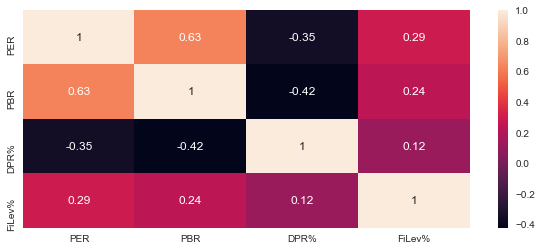

In [91]:
plt.figure(figsize=(10,4))
sns.heatmap(stat06, annot=True)
plt.savefig("matrice de corr des variables PER-PBR-DPR%-FiLev%.png")

**Centrage et réduction des données**

In [92]:
df02 = cr.fit_transform(df2)
df02

array([[ 1.29684919e-01, -2.68385558e-01, -5.75098329e-02,
        -5.40744756e-01],
       [ 1.41910072e-02, -2.72287913e-02, -8.54185947e-01,
        -3.52707682e-01],
       [-6.47441666e-01, -1.30535966e+00, -1.05927089e+00,
        -3.98267150e+00],
       [ 5.43742878e-01,  4.84023555e-01, -4.67679713e-01,
         4.31251397e-01],
       [-7.00273987e-01, -6.39766980e-01, -4.43633623e-02,
         5.71925750e-01],
       [ 8.63194122e-01,  5.90132532e-01, -6.38583830e-01,
         5.52839280e-01],
       [-5.96452333e-01, -5.38481137e-01,  7.18131928e-01,
         3.84595582e-01],
       [ 3.98146830e-01,  5.08139231e-01, -8.56815241e-01,
         2.30490010e-01],
       [-6.93577798e-02,  8.37033215e-02, -7.98970770e-01,
         3.21680922e-01],
       [-1.99595595e-01, -3.55201995e-01,  2.50117577e-01,
         4.02975146e-01],
       [-1.48606262e-01, -5.43304273e-01,  7.54942045e-01,
         2.04334477e-01],
       [-1.29125879e+00, -8.51984935e-01, -3.41473596e-01,
      

In [95]:
# Génération de la matrice des liens avant l'affichage du dendrogramme
z02 = linkage(df02, method="ward", metric="euclidean")

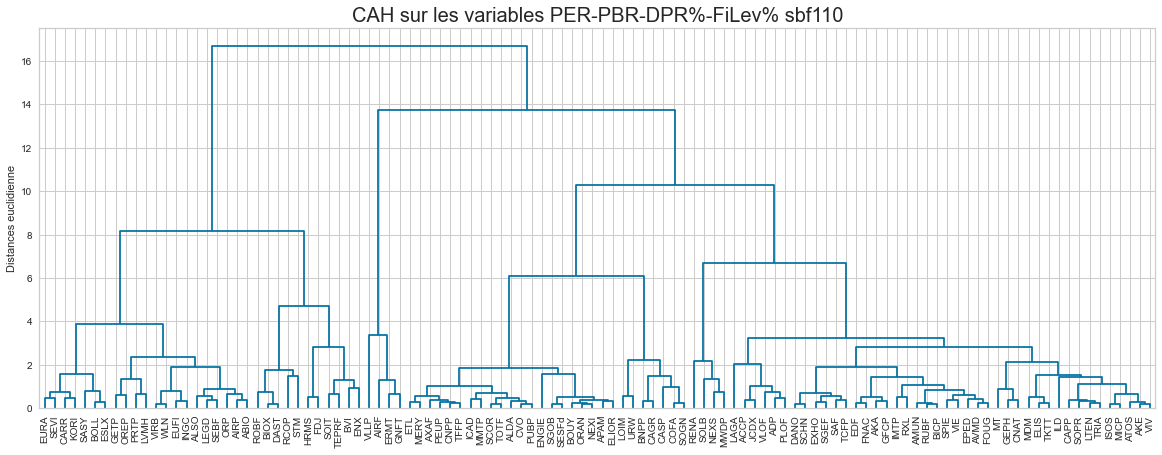

In [96]:
# Affichage du dendrogram avec les sigle
plt.figure(figsize=(20,7))
plt.title("CAH sur les variables PER-PBR-DPR%-FiLev% sbf110", fontsize=20)
plt.ylabel("Distances euclidienne")
dendrogram(z02, labels=list(df.index), leaf_font_size=10, color_threshold=0)
plt.savefig("CAH04 sur les variables PER-PBR-DPR%-FiLev% sbf110.png")
plt.show()

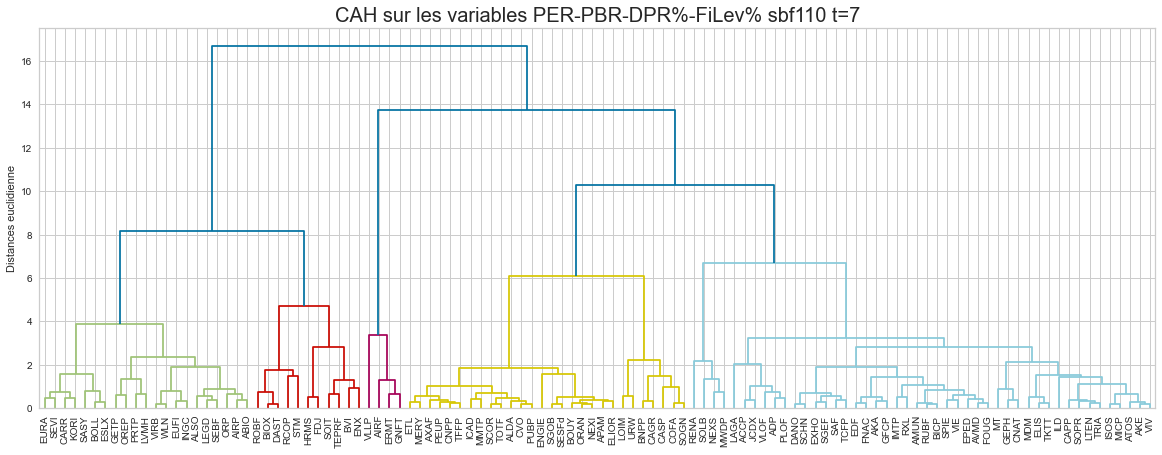

In [97]:
# Affichage du dendrogram avec les sigle
plt.figure(figsize=(20,7))
plt.title("CAH sur les variables PER-PBR-DPR%-FiLev% sbf110 t=7", fontsize=20)
plt.ylabel("Distances euclidienne")
dendrogram(z02, labels=list(df.index), leaf_font_size=10, color_threshold=7)
plt.savefig("CAH04 sur les variables PER-PBR-DPR%-FiLev% sbf110 t7.png")
plt.show()

In [98]:
cah04 = fcluster(z02, t=7, criterion="distance")
cah04

array([5, 5, 3, 1, 5, 1, 4, 1, 5, 5, 4, 5, 5, 5, 4, 2, 4, 1, 4, 2, 5, 1,
       4, 5, 4, 4, 4, 5, 5, 2, 5, 5, 4, 5, 3, 1, 1, 1, 2, 4, 5, 4, 4, 4,
       5, 3, 1, 5, 2, 4, 5, 5, 1, 5, 5, 1, 4, 1, 1, 1, 2, 5, 1, 4, 5, 4,
       5, 5, 5, 4, 1, 4, 5, 4, 2, 5, 5, 2, 5, 5, 4, 1, 5, 4, 1, 4, 5, 4,
       5, 2, 5, 5, 5, 2, 1, 5, 2, 4, 5, 4, 5, 4, 5, 3, 5, 5, 1, 5, 5, 1],
      dtype=int32)

In [99]:
np.unique(cah04, return_counts=True)

(array([1, 2, 3, 4, 5], dtype=int32), array([21, 11,  4, 28, 46], dtype=int64))

In [100]:
sbf["cah04"] = cah04

In [101]:
sbf["cah04"].replace(1,"cluster_1", inplace=True)
sbf["cah04"].replace(2,"cluster_2", inplace=True)
sbf["cah04"].replace(3,"cluster_3", inplace=True)
sbf["cah04"].replace(4,"cluster_4", inplace=True)
sbf["cah04"].replace(5,"cluster_5", inplace=True)
sbf.head(3)

,Valued,Val,Stock,L52w,H52w,Price,IVgn,IVdcf,BVPS,EPS,Div,CFPS,TBVPS,RevPS,MoS,ROE,ROA,DtoE,Lev,FiLev,Beta,EPR,DPR,CFP,PM,TSR,Payout,BMR,PER,PBR,PSR,PCF,Ind,Sector,Industry,Shares,Empl,MCap€M,BV€M,TBV€M,Rev€M,Ear€M,CF€M,ROE%,ROA%,TSR%,PM%,Pay%,EPR%,DPR%,cah01,cah02,cah03,FiLev%,cah04
Tick,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCP,Overvalued,0,Accor SA (ACCP),21.06,42.58,27.53,25.187558,-4.664286,18.04,1.49,1.05,-4.16,1.31,11.30,-0.093000,-0.2720,-0.1208,0.7631,-0.1343,-0.102484,1.06,0.054123,0.038140,-0.151108,0.131858,1.071700,0.704698,0.655285,18.476510,1.526053,2.436283,-6.617788,cac 40,Services,Hôtels et motels,270932350,196020,7458.768,4887.620,354.921,3061.536,403.689,-1127.079,-27.20,-12.08,107.17,13.19,70.47,5.41,3.81,cluster_2,cluster_4,cluster_4,-10.25,cluster_5
ADP,Overvalued,0,Aeroports de Paris SA (ADP),70.70,181.50,89.50,27.548482,6.283649,44.06,5.39,0.70,5.30,13.53,37.22,-2.248818,-0.0508,-0.0222,2.1257,-0.0357,-0.075887,1.14,0.060223,0.007821,0.059218,0.144815,1.577086,0.129870,0.492291,16.604824,2.031321,2.404621,16.886792,cac mid 60,Transport,Transports (divers),98944352,26122,8855.520,4359.488,1338.717,3682.709,533.310,524.405,-5.08,-2.22,157.71,14.48,12.99,6.02,0.78,cluster_3,cluster_5,cluster_5,-7.59,cluster_5
AIRF,Overvalued,0,Air France - KLM SA (AIRF),3.26,11.11,3.73,9.036426,-2.601564,-5.99,0.64,0.00,-2.03,-9.49,44.76,0.587226,0.2197,-0.1294,4.1243,-0.1429,-0.589362,0.99,0.171582,0.000000,-0.544236,0.014298,2.407975,0.000000,-1.605898,5.828125,-0.622705,0.083333,-1.837438,cac mid 60,Transport,Compagnies aériennes,427432464,83896,1594.323,-2560.320,-4056.334,19131.877,273.557,-867.688,21.97,-12.94,240.80,1.43,0.00,17.16,0.00,cluster_2,cluster_4,cluster_4,-58.94,cluster_3


In [102]:
fig = px.box(sbf, x="cah04", y="PER", hover_data=["DPR%","TSR%","PBR","ROA","ROE","CFP","FiLev%"], hover_name="Stock",
                labels={"PER":"Price-to-Earnings", "cah04":"Label des clusters cah04"},  points="all",
             title="Analyse des caractéristiques des clusters cah04 selon le PER")
fig.show()

In [103]:
fig = px.box(sbf, x="cah04", y="FiLev%", hover_data=["DPR%","TSR%","PBR","ROA","ROE","CFP","EPR%"], hover_name="Stock",
                labels={"FiLev%":"Effet de levier financier en %", "cah04":"Label des clusters cah04"},  points="all",
             title="Analyse des caractéristiques des clusters cah04 selon l'Effet de levier financier en %'")
fig.show()

In [104]:
fig = px.box(sbf, x="cah01", y="FiLev%", hover_data=["DPR%","TSR%","PBR","ROA","ROE","CFP","EPR%"], hover_name="Stock",
                labels={"FiLev%":"Effet de levier financier en %", "cah01":"Label des clusters cah01"},  points="all",
             title="Analyse des caractéristiques des clusters cah01 selon l'Effet de levier financier en %'")
fig.show()

In [105]:
fig = px.box(sbf, x="cah03", y="FiLev%", hover_data=["DPR%","TSR%","PBR","ROA","ROE","CFP","EPR%"], hover_name="Stock",
                labels={"FiLev%":"Effet de levier financier en %", "cah03":"Label des clusters cah03"},  points="all",
             title="Analyse des caractéristiques des clusters cah03 selon l'Effet de levier financier en %'")
fig.show()

In [106]:
sbf.head(2)

,Valued,Val,Stock,L52w,H52w,Price,IVgn,IVdcf,BVPS,EPS,Div,CFPS,TBVPS,RevPS,MoS,ROE,ROA,DtoE,Lev,FiLev,Beta,EPR,DPR,CFP,PM,TSR,Payout,BMR,PER,PBR,PSR,PCF,Ind,Sector,Industry,Shares,Empl,MCap€M,BV€M,TBV€M,Rev€M,Ear€M,CF€M,ROE%,ROA%,TSR%,PM%,Pay%,EPR%,DPR%,cah01,cah02,cah03,FiLev%,cah04
Tick,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCP,Overvalued,0,Accor SA (ACCP),21.06,42.58,27.53,25.187558,-4.664286,18.04,1.49,1.05,-4.16,1.31,11.30,-0.093000,-0.2720,-0.1208,0.7631,-0.1343,-0.102484,1.06,0.054123,0.038140,-0.151108,0.131858,1.071700,0.704698,0.655285,18.476510,1.526053,2.436283,-6.617788,cac 40,Services,Hôtels et motels,270932350,196020,7458.768,4887.620,354.921,3061.536,403.689,-1127.079,-27.20,-12.08,107.17,13.19,70.47,5.41,3.81,cluster_2,cluster_4,cluster_4,-10.25,cluster_5
ADP,Overvalued,0,Aeroports de Paris SA (ADP),70.70,181.50,89.50,27.548482,6.283649,44.06,5.39,0.70,5.30,13.53,37.22,-2.248818,-0.0508,-0.0222,2.1257,-0.0357,-0.075887,1.14,0.060223,0.007821,0.059218,0.144815,1.577086,0.129870,0.492291,16.604824,2.031321,2.404621,16.886792,cac mid 60,Transport,Transports (divers),98944352,26122,8855.520,4359.488,1338.717,3682.709,533.310,524.405,-5.08,-2.22,157.71,14.48,12.99,6.02,0.78,cluster_3,cluster_5,cluster_5,-7.59,cluster_5


In [107]:
sbf.to_csv("sbf.csv")
sbf.to_excel("sbf.xlsx")